In [13]:
# notebooks/01_eda.ipynb の冒頭
import sys
import os
import numpy as np
import pandas as pd

# プロジェクトルートをパスに追加してsrcをインポート可能にする
sys.path.append(os.path.abspath('..'))

from src.config import DATA_DIR

# 特定のファイルへのフルパスを構築
file_path = DATA_DIR / 'wt262avs.adicht_rec2.npy'

# データの読み込み
data = np.load(file_path)

# データをDataFrameに変換
df = pd.DataFrame(data.T, columns=[f'Channel_{i+1}' for i in range(data.shape[0])])

# pklファイルとして保存
processed_dir = os.path.join('..', 'data', 'processed')
os.makedirs(processed_dir, exist_ok=True)
pkl_path = os.path.join(processed_dir, 'wt262avs_processed.pkl')
df.to_pickle(pkl_path)

print("Data loaded and saved as pickle successfully!")
print("Shape:", df.shape)
print("Saved to:", pkl_path)

Data loaded and saved as pickle successfully!
Shape: (4240450, 5)
Saved to: ..\data\processed\wt262avs_processed.pkl


C:\Users\dmasu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


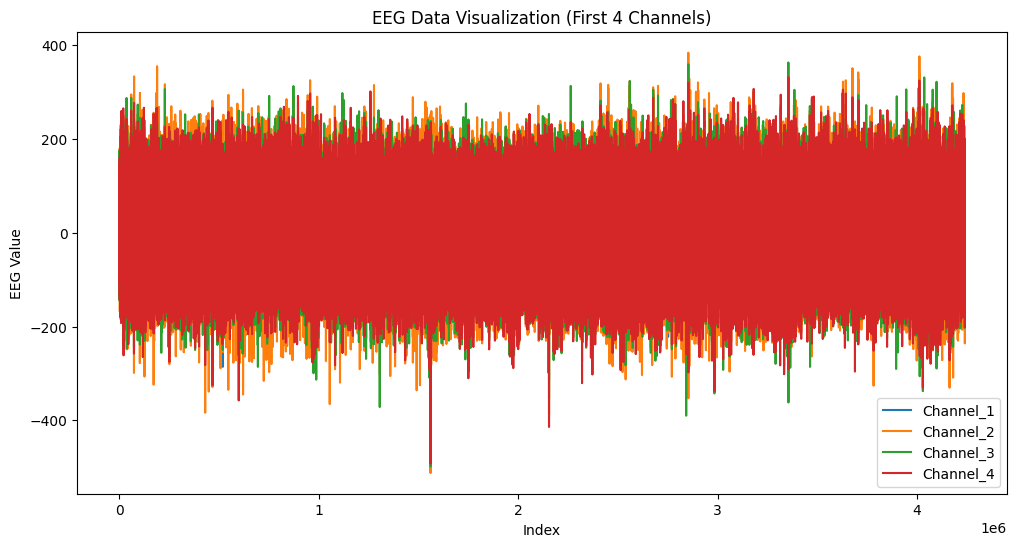

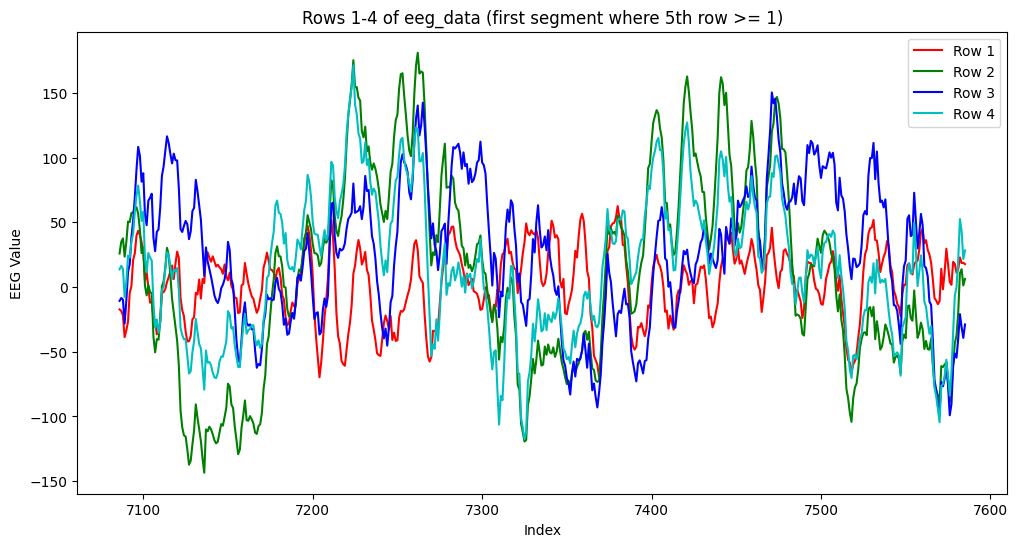

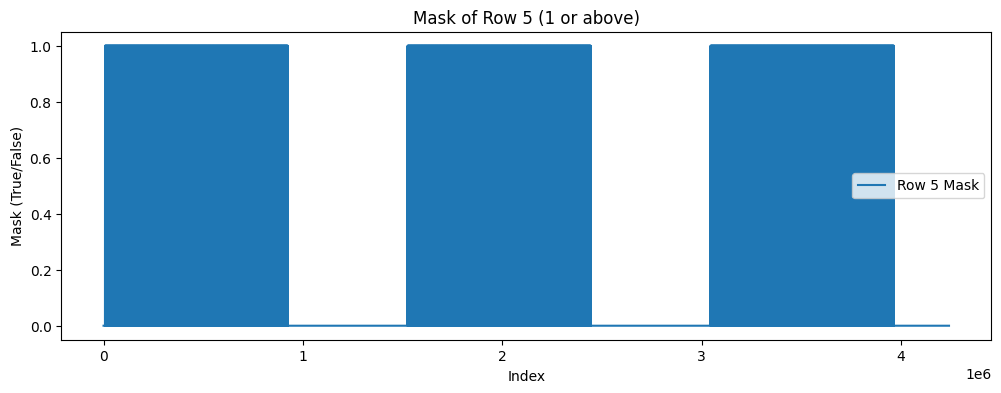

In [ ]:
from itertools import groupby
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# サンプリング周波数
fs = 1000  # Hz

# pklファイルを読み込む
processed_dir = os.path.join('..', 'data', 'processed')
pkl_path = os.path.join(processed_dir, 'wt262avs_processed.pkl')
df = pd.read_pickle(pkl_path)

# DataFrameの可視化（横軸を時間に変更）
time_axis = np.arange(len(df)) / fs
plt.figure(figsize=(12, 6))
for column in df.columns[:4]:  # 最初の4チャンネルをプロット
    plt.plot(time_axis, df[column], label=column)
plt.xlabel('Time [sec]')
plt.ylabel('EEG Value')
plt.title('EEG Data Visualization (First 4 Channels)')
plt.legend()
plt.show()

# eeg_dataの第五行（インデックス4）が1以上の区間を抽出
eeg_data = df.values.T
mask = eeg_data[4] >= 1
indices = np.where(mask)[0]

# 連続区間の開始・終了インデックスを探す
groups = []
for k, g in groupby(enumerate(indices), lambda x: x[0] - x[1]):
    group = list(map(itemgetter(1), g))
    groups.append(group)

if groups:
    first_group = groups[0]
    start = first_group[0]
    end = first_group[-1] + 1  # Pythonのスライスはend非含

    # 第一行から第四行（インデックス0-3）を色分けしてプロット（横軸を時間に変更）
    plt.figure(figsize=(12, 6))
    colors = ['r', 'g', 'b', 'c']
    for i in range(4):
        plt.plot(np.arange(start, end) / fs, eeg_data[i, start:end], label=f'Row {i+1}', color=colors[i])
    plt.xlabel('Time [sec]')
    plt.ylabel('EEG Value')
    plt.title('Rows 1-4 of eeg_data (first segment where 5th row >= 1)')
    plt.legend()
    plt.show()

    # 第五行（インデックス4）のマスクをプロット（横軸を時間に変更）
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(len(mask)) / fs, mask, label='Row 5 Mask')
    plt.xlabel('Time [sec]')
    plt.ylabel('Mask (True/False)')
    plt.title('Mask of Row 5 (1 or above)')
    plt.legend()
    plt.show()
else:
    print("該当する区間が見つかりませんでした。")